<a href="https://colab.research.google.com/github/anitarestrepo16/machine-learning-class-2023/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import random
from statsmodels.regression.linear_model import OLS

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# Chapter 5 - Question 6

In [ ]:
default = pd.read_csv('/drive/My Drive/Colab Notebooks/Data-Default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
encoding_dict = {'Yes': 1,'No': 0}
for col in ['default', 'student']:
    default[col] = default[col].map(encoding_dict)

default.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


## 6a

In [ ]:
X = default[['balance', 'income']]
X = sm.add_constant(X)

y = default['default']

display(X.head(), y.head())

results = sm.Logit(y, X).fit()
print(results.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,balance,income
0,1.0,729.526495,44361.625074
1,1.0,817.180407,12106.134700
2,1.0,1073.549164,31767.138947
3,1.0,529.250605,35704.493935
4,1.0,785.655883,38463.495879


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.4594
Time:                        02:58:13   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

se for balance = 0  
se for income = almost 0

## 6b  
Write a function, boot.fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

In [ ]:
def get_indices(data, n):
    '''
    Generates a random subsample (i.e., its indices)
    with replacement consisting of n observations each.

    Inputs:
        - data (pd.Dataframe): data to sample from
        - n (int): numeber of observations in the sample
    
    Output:
        - indices (np.ndarray): array of indices forming
            the samples
    '''
    assert type(data) == pd.DataFrame
    assert type(n) == int, 'n must be an integer'

    indices = np.random.choice(
        data.index,         # Indices as the input
        int(n),             # Number of indices per sample
        replace=True        # Draw samples with replacement
    )
    return indices

In [ ]:
def boot_fn(data, index, constant=True, features=['balance','income'], target='default'):
    '''
    Runs a logistic regression (with a constant) on only the specified
    indices within the data (i.e., on a single subsample).

    Inputs:
        - data (pd.Dataframe): data to sample from
        - indices (np.ndarray): array of indices forming the samples
        - features (lst of str): the name of the features
        - target (str): the name of the target

    Output:
        - coefficients (lst of float): the coefficients
    '''
    X = data[features].loc[index]
    if constant:
        X = sm.add_constant(X)
    y = data[target].loc[index]
    
    lr = sm.Logit(y,X).fit(disp=0)
    coefficients = [lr.params[0], lr.params[1], lr.params[2]]

    return coefficients

intercept, coef_balance, coef_income = boot_fn(default, get_indices(default, 10000))
print(f'Coefficients of a single subsample:\n\tIntercept:\t{round(intercept, 2)}\n\tBalance:\t{round(coef_balance, 2)}\n\tIncome:\t\t{round(coef_income, 2)}')

In [ ]:
def boot(data, func, B):
    coef_intercept = []
    coef_balance = []
    coef_income = []
    coefs = ['intercept', 'balance', 'income']
    output = {coef: [] for coef in coefs}
    for i in range(B):
        np.random.seed(i)
        reg_out = func(data, get_indices(data, len(data)))
        for i, coef in enumerate(coefs):
            output[coef].append(reg_out[i])
    results = {}
    for coef in coefs:
        results[coef] = {
            'estimate': np.mean(output[coef]),
            'std_err': np.std(output[coef])
        }
    return results

In [ ]:
results = boot(default, boot_fn, 1000)
for i, x in results.items():
    print(f"{i.capitalize()}:\n\tEstimate: {x['estimate']}\n\tStandard Error: {x['std_err']}")

# Chapter 5 - Question 8

## 8a

In [ ]:
random.seed(1)
x = np.random.normal(size = 100)

In [ ]:
x.shape

(100,)

In [ ]:
y = x - 2*x**2 + np.random.normal(size = 100)
y[:10]

array([ 2.56998578, -2.34436845, -3.92323837, -1.84392113,  0.69289999,
       -1.87053992, -3.74930843, -0.638478  ,  0.44732213,  1.10180702])


n = 100
p = 2  
  
y = βx + βx^2 + e




In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.559280,2.569986
1,0.957178,-2.344368
2,-1.134037,-3.923238
3,0.837402,-1.843921
4,0.228538,0.692900


## 8b

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


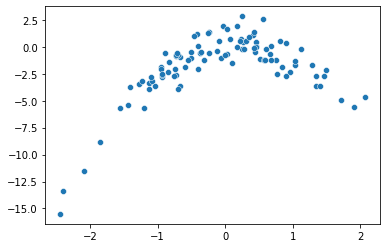

In [ ]:
sns.scatterplot(x, y)

## 8c

In [ ]:
random.seed(1)

In [ ]:
def loocv(data, powers):
    
    data_copy = data.copy()

    for power in powers:
        if power != 1:
            var_name = "x_" + str(power)
            data_copy[var_name] = np.power(data_copy['x'], power)
    
    features = [var_name for var_name in data_copy.columns if "y" not in var_name]

    squared_errors = []
    for i in data_copy.index:
        train = data_copy.iloc[data_copy.index != i, :]
        test = data_copy.iloc[data_copy.index == i, :]
        mod = LinearRegression().fit(train.drop(['y'], axis = 1), train['y'])
        test_predicted = mod.predict(test.drop(['y'], axis = 1))
        test_actual = test[['y']]
        squared_error = np.power(test_predicted - test_actual, 2)

        squared_errors.append(squared_error.values[0][0])

    # From the squared errors, get the Mean Squared Error (MSE)
    return (features, round(np.mean(squared_errors), 5))

In [ ]:
loocv(df, [1])

(['x'], 7.27219)

In [ ]:
loocv(df, [1, 2])

(['x', 'x_2'], 1.16485)

In [ ]:
loocv(df, [1, 2, 3])

(['x', 'x_2', 'x_3'], 1.16399)

In [ ]:
loocv(df, [1, 2, 3, 4])

(['x', 'x_2', 'x_3', 'x_4'], 1.16917)

## 8d

In [ ]:
random.seed(2)


In [ ]:
loocv(df, [1])

(['x'], 7.27219)

## 8f

In [ ]:
powers = [1, 2, 3, 4]
for power in powers:
    if power != 1:
        var_name = "x_" + str(power)
        df[var_name] = np.power(df['x'], power)

df.head()

,x,y,x_2,x_3,x_4
0,0.559280,2.569986,0.312794,0.174939,0.097840
1,0.957178,-2.344368,0.916189,0.876956,0.839402
2,-1.134037,-3.923238,1.286039,-1.458415,1.653896
3,0.837402,-1.843921,0.701242,0.587221,0.491740
4,0.228538,0.692900,0.052229,0.011936,0.002728


In [ ]:
df = sm.add_constant(df)
df.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,x,y,x_2,x_3,x_4
0,1.0,0.559280,2.569986,0.312794,0.174939,0.097840
1,1.0,0.957178,-2.344368,0.916189,0.876956,0.839402
2,1.0,-1.134037,-3.923238,1.286039,-1.458415,1.653896
3,1.0,0.837402,-1.843921,0.701242,0.587221,0.491740
4,1.0,0.228538,0.692900,0.052229,0.011936,0.002728


In [ ]:
mod = sm.OLS(df['y'], df.drop(['y'], axis = 1))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     166.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           5.54e-42
Time:                        04:42:14   Log-Likelihood:                -143.74
No. Observations:                 100   AIC:                             297.5
Df Residuals:                      95   BIC:                             310.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2578      0.163      1.582      0.1

# Chapter 6 - Question 11

In [3]:
boston = pd.read_csv('/drive/My Drive/Colab Notebooks/Boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = boston.drop(['CRIM'], axis = 1)
y = boston['CRIM']

## 11a. 
in part (a), use forward stepwise & backwards stepwise selection (FSS & BSS) instead of the methods the book lists. Do so based on a mathematical ad- justment approach (AIC) and 5-Fold Cross-Validation (5FCV) to estimat the test error. (This means you will select a model four different ways: FSS-AIC, FSS- 5FCV, BSS-AIC, BSS-5FCV.)


## Forward Selection with sklearn

In [ ]:
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select = None, scoring = 'neg_mean_squared_error')
sfs.fit(X, y).feature_names_in_

array(['constant', 'RAD', 'LSTAT', 'B', 'MDEV', 'ZN', 'DIS', 'NOX',
       'PTRATIO', 'TAX'], dtype=object)

In [ ]:
sfs.support_

array([ True,  True,  True, False, False,  True, False, False,  True,
       False])

In [ ]:
sfs.feature_names_in_[sfs.support_]

array(['constant', 'RAD', 'LSTAT', 'ZN', 'PTRATIO'], dtype=object)

Sad... can't really do the same thing with sklearn because cannot specify custom stopping rule (i.e. stopping when the minimum error is larger than the current error). Though does seem that newer releases will allow for a tolerance parameter but currently can't use...

## Forward selection with lab code

### 5-Fold Cross Validation

In [10]:
# Add constant to dataframe
boston['constant'] = 1 

# Specify target
Y = boston['CRIM']

# Variables to use in forward propagation
vars_left_add = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'] 

# Regression type
ols = LinearRegression()

# Starting variables (constant initially)
current_vars = ['constant']

X = boston[current_vars]
benchmark_error = np.mean(-1*cross_val_score(ols, X, Y, cv = 5, scoring = 'neg_mean_squared_error'))
print(' Initial run with only one var (constant term/only bias weight):', current_vars)
print('      Benchmark error:', benchmark_error)
print('')

# Keep adding the best variables (until no improvement can be made)
for iter in range(len(vars_left_add)):
    print('\033[1m'+ 'Iteration:', iter, '\033[0m')
    error_list = []
    # Iterate over all the variables left to add
    for var in vars_left_add:
        # Modify X according to current iteration
        X = boston[current_vars + [var]]
        # Perform 5-fold CV to get errors
        error = np.mean(-1*cross_val_score(ols, X, Y, cv = 5, scoring = 'neg_mean_squared_error'))
        error_list.append(error)
        print(' Running model with:', current_vars + [var])
        print('      Error:', error)

    # Chose the smallest error
    min_error = min(error_list)
    chosen_col_index = error_list.index(min_error)

    # If our current smallest error is smaller than our previous error, than we add a variable
    if min_error < benchmark_error:
        print('          *** Variable selected:', vars_left_add[chosen_col_index])
        print('          *** Min error selected:', min_error)
        print('          *** Chose the variable that generated the min error + was lower than previous error')
        print('')
        # Add the variable that produced the smallest error to current_vars
        current_vars.append(vars_left_add[chosen_col_index])
        # Delete chosen variable from vars_left_add
        del vars_left_add[chosen_col_index] 
        # Update benchmark_error
        benchmark_error = min_error
    
    # Otherwise, we stop our model
    else:
        print('          \033[4m*** No variable was selected', '\033[0m')
        print('          *** Previous error rate (', benchmark_error,') is lower than smallest error rate of this iteration (', min_error ,')')
        print('          *** Break')
        break

print('')
print('Variables chosen for our model', current_vars)

 Initial run with only one var (constant term/only bias weight): ['constant']
      Benchmark error: 82.92758188752097

Iteration: 0 
 Running model with: ['constant', 'ZN']
      Error: 80.2739780556212
 Running model with: ['constant', 'INDUS']
      Error: 74.78890656928952
 Running model with: ['constant', 'CHAS']
      Error: 83.41765212625346
 Running model with: ['constant', 'NOX']
      Error: 72.93199505968975
 Running model with: ['constant', 'RM']
      Error: 79.28682676023121
 Running model with: ['constant', 'AGE']
      Error: 76.67580886003631
 Running model with: ['constant', 'DIS']
      Error: 74.28733132761663
 Running model with: ['constant', 'RAD']
      Error: 45.82003611707332
 Running model with: ['constant', 'TAX']
      Error: 49.99382062232204
 Running model with: ['constant', 'PTRATIO']
      Error: 77.67773955150695
 Running model with: ['constant', 'B']
      Error: 76.79597319366994
 Running model with: ['constant', 'LSTAT']
      Error: 67.7959006776936

### AIC

In [11]:
# Add constant to dataframe
boston['constant'] = 1 

# Specify target
Y = boston['CRIM']

# Variables to use in forward propagation
vars_left_add = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'] 

# Regression type
ols = LinearRegression()

# Starting variables (constant initially)
current_vars = ['constant']

X = boston[current_vars]
benchmark_error = OLS(Y, X).fit().aic
print(' Initial run with only one var (constant term/only bias weight):', current_vars)
print('      Benchmark error:', benchmark_error)
print('')

# Keep adding the best variables (until no improvement can be made)
for iter in range(len(vars_left_add)):
    print('\033[1m'+ 'Iteration:', iter, '\033[0m')
    error_list = []
    # Iterate over all the variables left to add
    for var in vars_left_add:
        # Modify X according to current iteration
        X = boston[current_vars + [var]]
        # Perform 5-fold CV to get errors
        error = OLS(Y, X).fit().aic
        error_list.append(error)
        print(' Running model with:', current_vars + [var])
        print('      Error:', error)

    # Chose the smallest error
    min_error = min(error_list)
    chosen_col_index = error_list.index(min_error)

    # If our current smallest error is smaller than our previous error, than we add a variable
    if min_error < benchmark_error:
        print('          *** Variable selected:', vars_left_add[chosen_col_index])
        print('          *** Min error selected:', min_error)
        print('          *** Chose the variable that generated the min error + was lower than previous error')
        print('')
        # Add the variable that produced the smallest error to current_vars
        current_vars.append(vars_left_add[chosen_col_index])
        # Delete chosen variable from vars_left_add
        del vars_left_add[chosen_col_index] 
        # Update benchmark_error
        benchmark_error = min_error
    
    # Otherwise, we stop our model
    else:
        print('          \033[4m*** No variable was selected', '\033[0m')
        print('          *** Previous error rate (', benchmark_error,') is lower than smallest error rate of this iteration (', min_error ,')')
        print('          *** Break')
        break

print('')
print('Variables chosen for our model', current_vars)

 Initial run with only one var (constant term/only bias weight): ['constant']
      Benchmark error: 3614.1694785562504

Iteration: 0 
 Running model with: ['constant', 'ZN']
      Error: 3595.627661797868
 Running model with: ['constant', 'INDUS']
      Error: 3525.7755232365867
 Running model with: ['constant', 'CHAS']
      Error: 3614.619980334153
 Running model with: ['constant', 'NOX']
      Error: 3519.243655311626
 Running model with: ['constant', 'RM']
      Error: 3591.08064952379
 Running model with: ['constant', 'AGE']
      Error: 3549.7294697160696
 Running model with: ['constant', 'DIS']
      Error: 3538.1963952494225
 Running model with: ['constant', 'RAD']
      Error: 3368.604026632944
 Running model with: ['constant', 'TAX']
      Error: 3409.056271006969
 Running model with: ['constant', 'PTRATIO']
      Error: 3572.2770418517935
 Running model with: ['constant', 'B']
      Error: 3538.4366380342935
 Running model with: ['constant', 'LSTAT']
      Error: 3500.40253

## Backward Selection with lab code

### 5-Fold Cross Validation

In [12]:
# Add constant to dataframe
boston['constant'] = 1 

# Specify target
Y = boston['CRIM']

# Variables to use in forward propagation
vars_left_to_drop = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'] 

# Regression type
ols = LinearRegression()


# Starting variables (all)
current_vars = ['constant'] + vars_left_to_drop

X = boston[current_vars]
benchmark_error = np.mean(-1*cross_val_score(ols, X, Y, cv = 5, scoring = 'neg_mean_squared_error'))
print(' Initial run with all vars:', current_vars)
print('      Benchmark error:', benchmark_error)
print('')

# Keep removing the worst variables (until no improvement can be made)
for iter in range(len(vars_left_to_drop)):
    print('\033[1m'+ 'Iteration:', iter, '\033[0m')
    error_list = []
    # Iterate over all the variables left to remove
    for var in vars_left_to_drop:
        # Modify X according to current iteration
        vars_to_be_used = ['constant'] + [i for i in vars_left_to_drop if i != var]
        X = boston[['constant'] + [i for i in vars_left_to_drop if i != var]]
        # Perform 5-fold CV to get errors
        error = np.mean(-1*cross_val_score(ols, X, Y, cv = 5, scoring = 'neg_mean_squared_error'))
        error_list.append(error)
        print(' Running model with:', vars_to_be_used)
        print('      Error:', error)

    # Chose the largest error
    min_error = min(error_list)
    chosen_col_index = error_list.index(min_error)

    # If our current smallest error is smaller than our previous error, then we drop the variable associated with it
    if min_error < benchmark_error:
        print('          *** Will drop:', vars_left_to_drop[chosen_col_index])
        print('          *** Min error selected:', min_error)
        print('          *** Chose the variable that generated the min error + was lower than previous error')
        print('')
        # Delete chosen variable from current_vars and vars_left_to_drop
        del current_vars[chosen_col_index + 1]
        del vars_left_to_drop[chosen_col_index]
        # Update benchmark_error
        benchmark_error = min_error
    
    # If not, we keep our model
    else:
        print('          \033[4m*** No variable was selected', '\033[0m')
        print('          *** Previous error rate (', benchmark_error,') is lower than smallest error rate of this iteration (', min_error ,')')
        print('          *** Break')
        break

print('')
print('Variables chosen for our model', current_vars)

 Initial run with all vars: ['constant', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Benchmark error: 50.377834267265555

Iteration: 0 
 Running model with: ['constant', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 51.05837513173866
 Running model with: ['constant', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 49.45033720517616
 Running model with: ['constant', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 50.1386179125515
 Running model with: ['constant', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 49.56409044975207
 Running model with: ['constant', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 47.10566457565359
 Running model with: ['constant'

### AIC

In [13]:
# Add constant to dataframe
boston['constant'] = 1 

# Specify target
Y = boston['CRIM']

# Variables to use in forward propagation
vars_left_to_drop = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'] 

# Regression type
ols = LinearRegression()


# Starting variables (all)
current_vars = ['constant'] + vars_left_to_drop

X = boston[current_vars]
benchmark_error = OLS(Y, X).fit().aic
print(' Initial run with all vars:', current_vars)
print('      Benchmark error:', benchmark_error)
print('')

# Keep removing the worst variables (until no improvement can be made)
for iter in range(len(vars_left_to_drop)):
    print('\033[1m'+ 'Iteration:', iter, '\033[0m')
    error_list = []
    # Iterate over all the variables left to remove
    for var in vars_left_to_drop:
        # Modify X according to current iteration
        vars_to_be_used = ['constant'] + [i for i in vars_left_to_drop if i != var]
        X = boston[['constant'] + [i for i in vars_left_to_drop if i != var]]
        # Perform 5-fold CV to get errors
        error = OLS(Y, X).fit().aic
        error_list.append(error)
        print(' Running model with:', vars_to_be_used)
        print('      Error:', error)

    # Chose the largest error
    min_error = min(error_list)
    chosen_col_index = error_list.index(min_error)

    # If our current smallest error is smaller than our previous error, then we drop the variable associated with it
    if min_error < benchmark_error:
        print('          *** Will drop:', vars_left_to_drop[chosen_col_index])
        print('          *** Min error selected:', min_error)
        print('          *** Chose the variable that generated the min error + was lower than previous error')
        print('')
        # Delete chosen variable from current_vars and vars_left_to_drop
        del current_vars[chosen_col_index + 1]
        del vars_left_to_drop[chosen_col_index]
        # Update benchmark_error
        benchmark_error = min_error
    
    # If not, we keep our model
    else:
        print('          \033[4m*** No variable was selected', '\033[0m')
        print('          *** Previous error rate (', benchmark_error,') is lower than smallest error rate of this iteration (', min_error ,')')
        print('          *** Break')
        break

print('')
print('Variables chosen for our model', current_vars)

 Initial run with all vars: ['constant', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Benchmark error: 3339.385162839013

Iteration: 0 
 Running model with: ['constant', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 3343.20771130992
 Running model with: ['constant', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 3337.9400281667763
 Running model with: ['constant', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 3337.7870578241814
 Running model with: ['constant', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 3341.5159785696305
 Running model with: ['constant', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MDEV']
      Error: 3337.7788683231893
 Running model with: ['consta

## 11b  
Propose a model (or set of models) that seem to perform well on
this data set, and justify your answer. Make sure that you are
evaluating model performance using validation set error, crossvalidation,
or some other reasonable alternative, as opposed to
using training error.

In [8]:
def get_mean_error(data, features, outcome):
    return np.mean(-1*cross_val_score(LinearRegression(), data[features], data[outcome], cv = 5, scoring = 'neg_mean_squared_error'))

In [18]:
get_mean_error(boston, ['AGE', 'B'], "CRIM")

77.70313920217322

In [30]:
def compare_mods(mod_list, data, outcome, seed):
    random.seed(seed)
    comparisons = {}
    for mod in mod_list:
        error = get_mean_error(data, mod, outcome)
        comparisons[str(mod)] = error

    return comparisons

In [28]:
mods = [['RAD', 'LSTAT', 'ZN'], \
        ['RAD', 'LSTAT', 'B', 'MDEV', 'ZN', 'DIS', 'NOX', 'PTRATIO'], \
        ['ZN', 'INDUS', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'MDEV'], \
        ['ZN', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT', 'MDEV']]

In [31]:
compare_mods(mods, boston, "CRIM", 42)

{"['RAD', 'LSTAT', 'ZN']": 44.46585900848579,
 "['RAD', 'LSTAT', 'B', 'MDEV', 'ZN', 'DIS', 'NOX', 'PTRATIO']": 45.62012009007763,
 "['ZN', 'INDUS', 'DIS', 'RAD', 'PTRATIO', 'LSTAT', 'MDEV']": 44.57164670513218,
 "['ZN', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT', 'MDEV']": 45.62012009007771}